In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
#Membaca dataset
data = pd.read_csv('/content/imdb_movies.csv')
print(data.columns)

Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')


In [3]:
#Menghapus kolom yang tidak perlu
data.drop(columns=['score', 'overview', 'crew', 'orig_title', 'status', 'orig_lang', 'budget_x', 'revenue', 'country'], inplace=True)

#Menampilkan kolom yang tersisa
print(data.columns)


Index(['names', 'date_x', 'genre'], dtype='object')


In [4]:
film_count_per_year = defaultdict(int) #Untuk menyimpan jumlah film per tahun

for year in range(1970, 2023):
    filtered_data = data[data['date_x'].str.contains(str(year))]  # Filter data berdasarkan tahun
    film_count = filtered_data['names'].count()  # Menghitung jumlah film

    film_count_per_year[year] = film_count  # Simpan jumlah film pada tahun ke dictionary

# Print film_count_per_year
for year, count in film_count_per_year.items():
    print(year, count)

1970 14
1971 25
1972 25
1973 30
1974 29
1975 28
1976 29
1977 33
1978 36
1979 35
1980 46
1981 62
1982 44
1983 50
1984 70
1985 75
1986 74
1987 63
1988 72
1989 73
1990 77
1991 91
1992 85
1993 105
1994 120
1995 112
1996 106
1997 110
1998 135
1999 116
2000 136
2001 152
2002 149
2003 157
2004 207
2005 205
2006 214
2007 219
2008 234
2009 259
2010 267
2011 271
2012 262
2013 298
2014 343
2015 350
2016 389
2017 434
2018 469
2019 470
2020 449
2021 627
2022 954


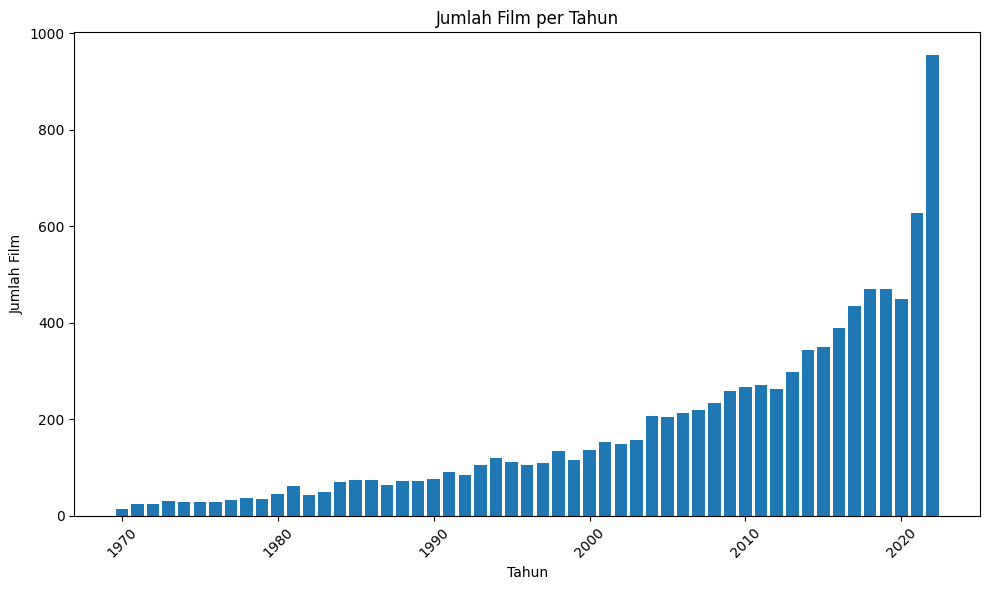

In [5]:
#Grafik jumlah film per tahun
plt.figure(figsize=(10, 6))
plt.bar(film_count_per_year.keys(), film_count_per_year.values())
plt.title('Jumlah Film per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
film_count_per_range = defaultdict(int) #Untuk menyimpan jumlah film dalam rentang 5 tahun

for start_year in range(1970, 2020, 5):
    end_year = start_year + 4
    film_count_per_range[f"{start_year} - {end_year}"] = sum(film_count_per_year[year] for year in range(start_year, end_year + 1))

#Untuk rentang 2020-2022
#start_year = 2020
#end_year = 2022
#film_count_per_range[f"{start_year} - {end_year}"] = sum(film_count_per_year[year] for year in range(start_year, end_year + 1))

#Menghitung rata-rata perilisan film dalam rentang 5 tahun
average_release_per_range = {year_range: count / 5 for year_range, count in film_count_per_range.items()}

print("Jumlah film per rentang 5 tahun:")
for year_range, count in film_count_per_range.items():
    print(f"{year_range}: {count} film")

print("Rata-rata perilisan film per rentang 5 tahun:")
for year_range, average in average_release_per_range.items():
    print(f"{year_range}: {average:.0f} film")

Jumlah film per rentang 5 tahun:
1970 - 1974: 123 film
1975 - 1979: 161 film
1980 - 1984: 272 film
1985 - 1989: 357 film
1990 - 1994: 478 film
1995 - 1999: 579 film
2000 - 2004: 801 film
2005 - 2009: 1131 film
2010 - 2014: 1441 film
2015 - 2019: 2112 film
Rata-rata perilisan film per rentang 5 tahun:
1970 - 1974: 25 film
1975 - 1979: 32 film
1980 - 1984: 54 film
1985 - 1989: 71 film
1990 - 1994: 96 film
1995 - 1999: 116 film
2000 - 2004: 160 film
2005 - 2009: 226 film
2010 - 2014: 288 film
2015 - 2019: 422 film


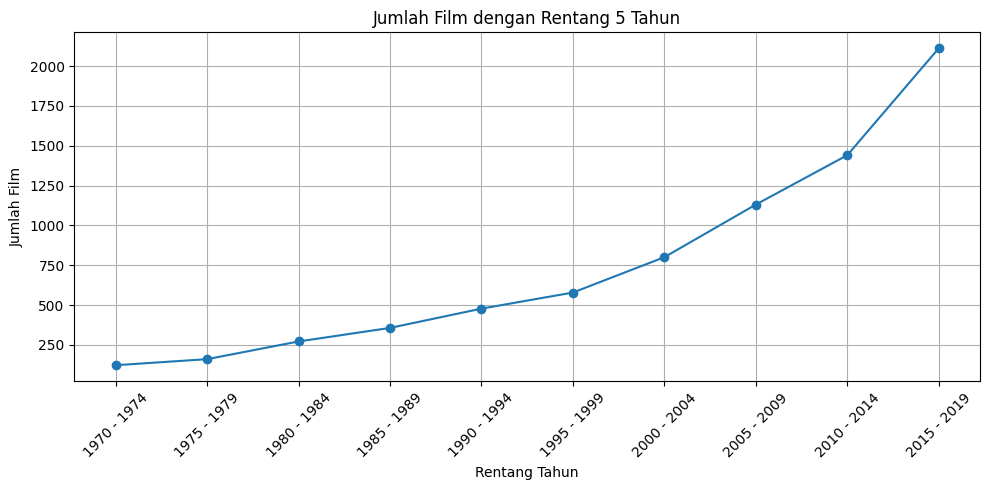

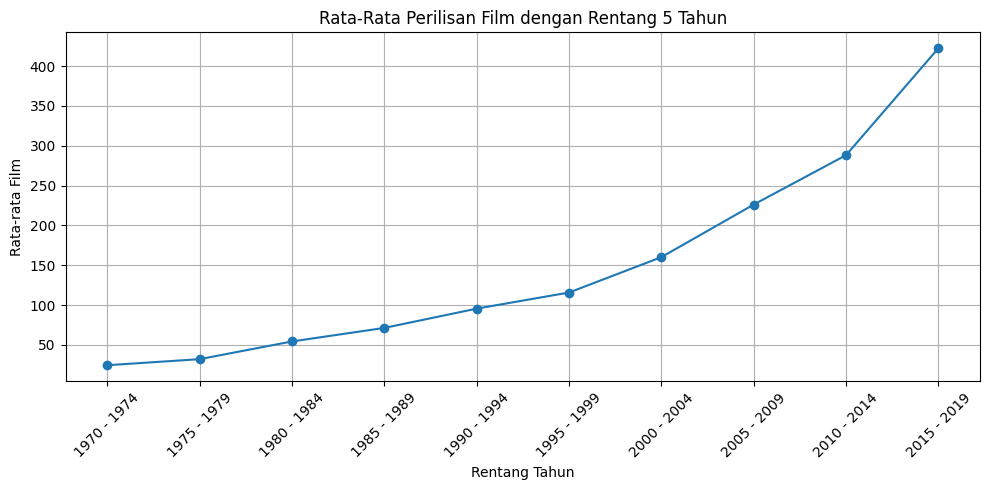

In [7]:
# Membuat grafik line untuk jumlah film dengan rentang 5 tahun
years = list(film_count_per_range.keys())
counts = list(film_count_per_range.values())

plt.figure(figsize=(10, 5))
plt.plot(years, counts, marker='o')
plt.title("Jumlah Film dengan Rentang 5 Tahun")
plt.xlabel("Rentang Tahun")
plt.ylabel("Jumlah Film")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Membuat grafik line untuk jumlah film dengan rentang 5 tahun
years = list(average_release_per_range.keys())
counts = list(average_release_per_range.values())

plt.figure(figsize=(10, 5))
plt.plot(years, counts, marker='o')
plt.title("Rata-Rata Perilisan Film dengan Rentang 5 Tahun")
plt.xlabel("Rentang Tahun")
plt.ylabel("Rata-rata Film")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
data = data.dropna(subset=['genre']) #Menghapus baris dengan nilai NaN

cleaned_genre_dict = {} #Untuk menyimpan genre berdasarkan tahun

for year in range(1970, 2023):
    filtered_data = data[data['date_x'].str.contains(str(year))]  #Filter data berdasarkan tahun

    genre_count = defaultdict(int)  #Untuk menghitung genre

    for i, n in enumerate(filtered_data['genre']):
        cleaned_genres = n.replace('\xa0', ' ')  #Ganti karakter '\xa0' dengan spasi
        genre_list = cleaned_genres.split(', ')   #Memisahkan genre

        for genre in genre_list:
            genre_count[genre] += 1  #Menghitung jumlah genre

    cleaned_genre_dict[year] = genre_count

for year, genre_count in cleaned_genre_dict.items():
    print(year, genre_count)

1970 defaultdict(<class 'int'>, {'Western': 7, 'Drama': 6, 'Crime': 1, 'Comedy': 4, 'Adventure': 3, 'Science Fiction': 1, 'Mystery': 1, 'Action': 2, 'War': 3, 'Thriller': 1})
1971 defaultdict(<class 'int'>, {'Animation': 1, 'Comedy': 8, 'Family': 3, 'Adventure': 4, 'Fantasy': 3, 'Drama': 9, 'Action': 8, 'Thriller': 6, 'Science Fiction': 4, 'Romance': 1, 'Western': 3, 'Music': 1, 'Crime': 3, 'War': 1, 'History': 2})
1972 defaultdict(<class 'int'>, {'Drama': 11, 'Crime': 7, 'Thriller': 9, 'Horror': 3, 'Science Fiction': 4, 'Action': 8, 'Adventure': 5, 'Comedy': 2, 'Romance': 2, 'Western': 2, 'Mystery': 1, 'Music': 1, 'History': 1})
1973 defaultdict(<class 'int'>, {'Drama': 11, 'Music': 1, 'Romance': 4, 'Comedy': 7, 'Action': 10, 'Adventure': 3, 'History': 1, 'Thriller': 6, 'Animation': 2, 'Science Fiction': 5, 'Western': 3, 'Mystery': 1, 'TV Movie': 1, 'Crime': 3, 'Horror': 2, 'Fantasy': 2, 'Family': 1, 'War': 1})
1974 defaultdict(<class 'int'>, {'Comedy': 11, 'Romance': 10, 'Drama': 22,

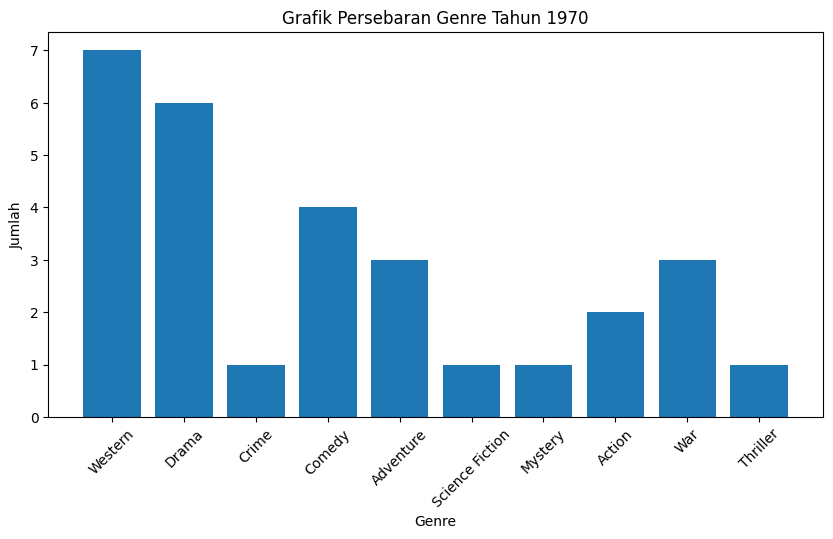

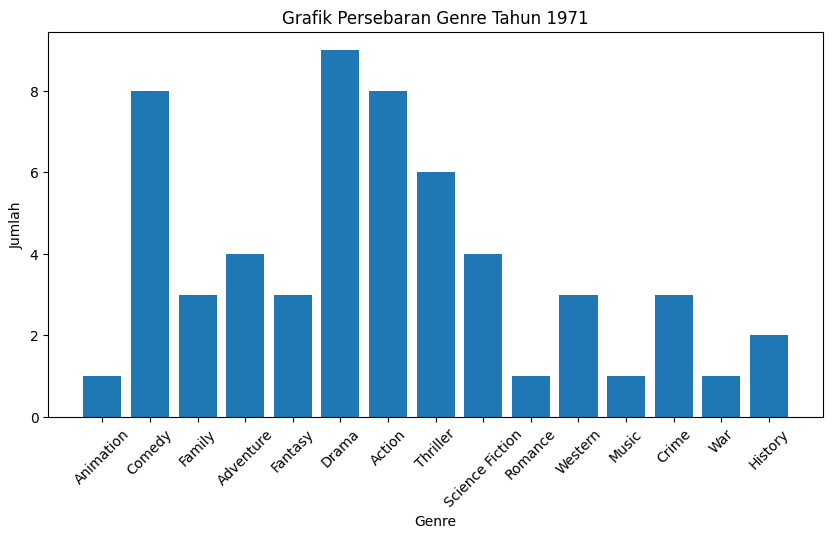

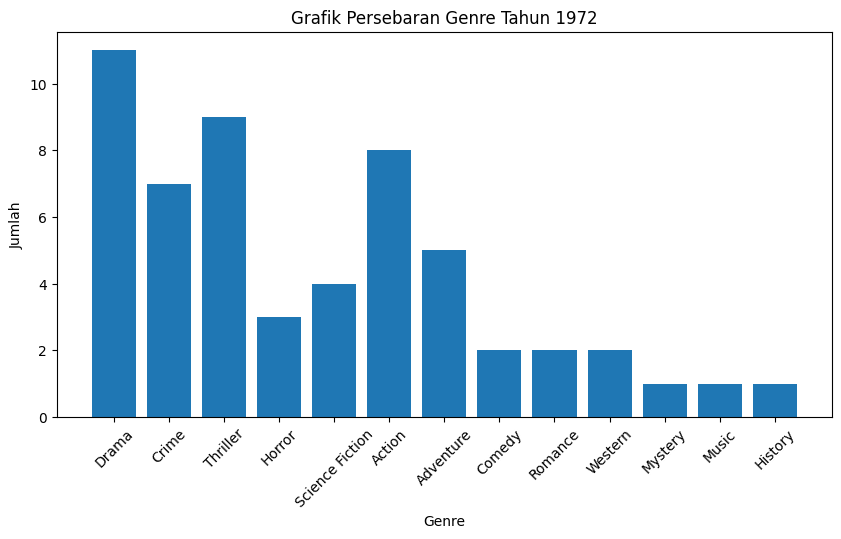

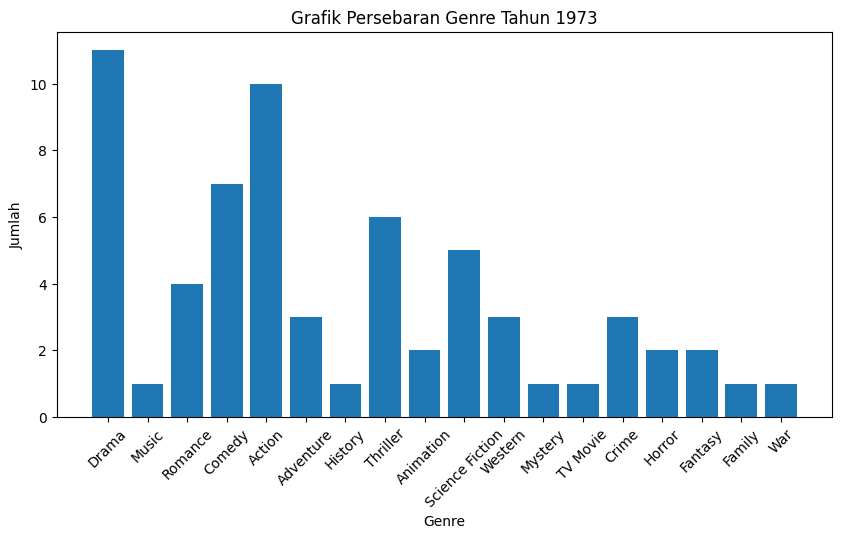

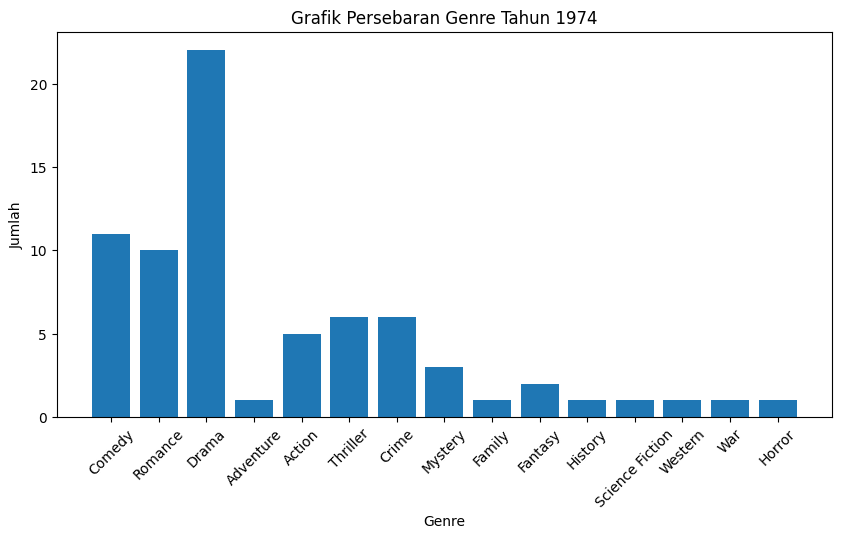

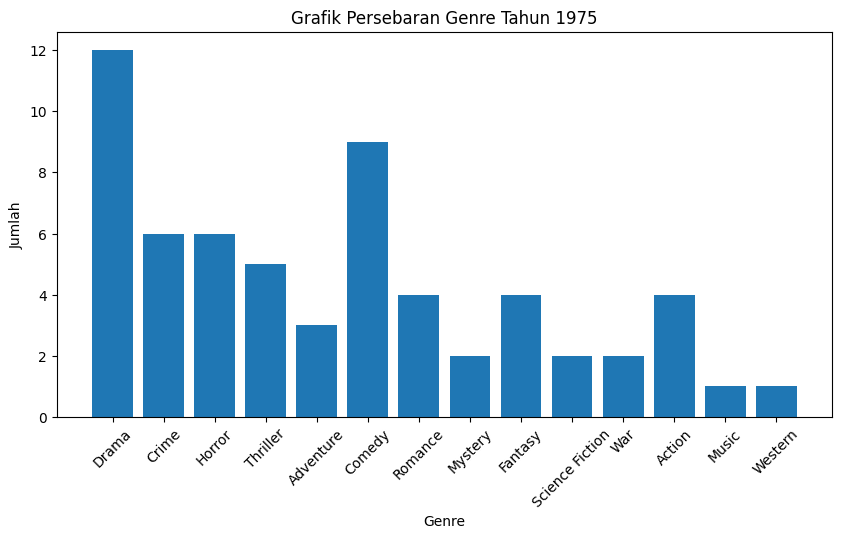

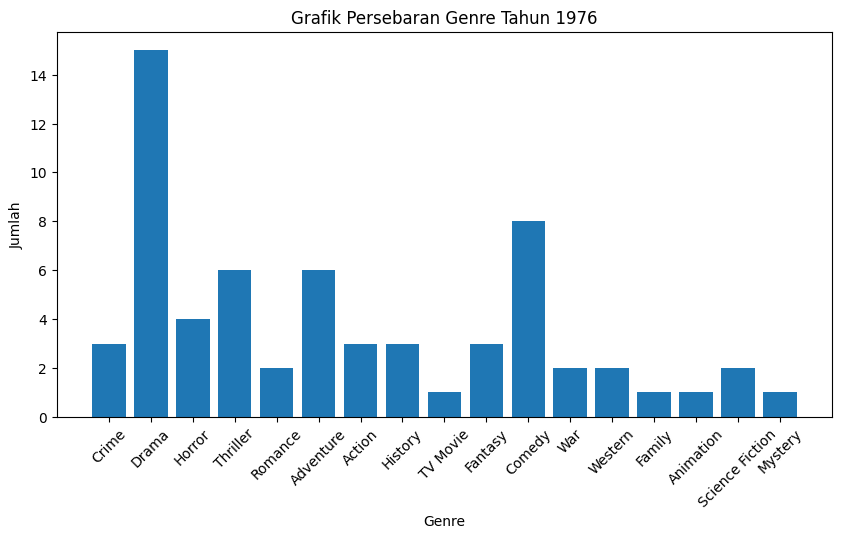

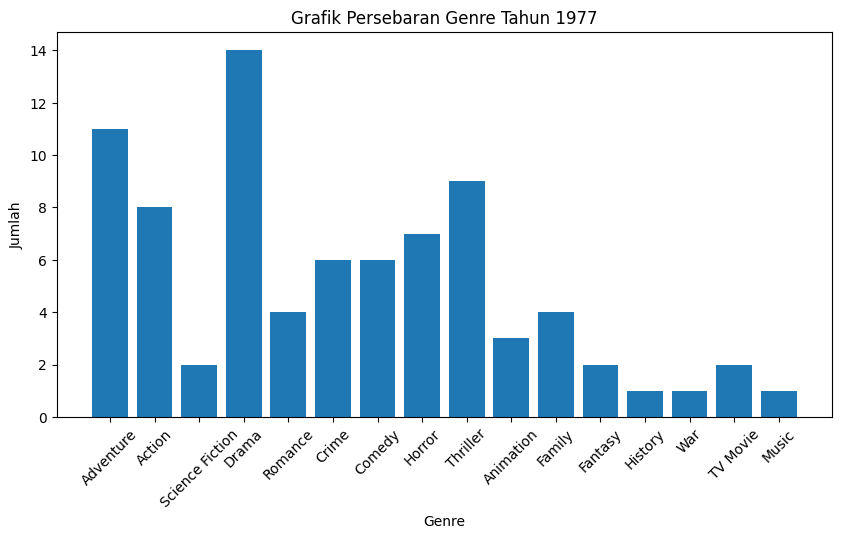

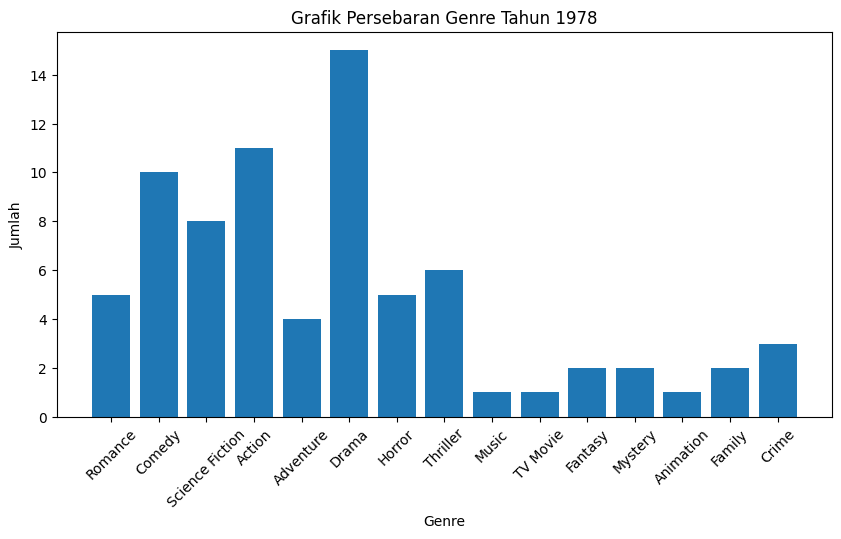

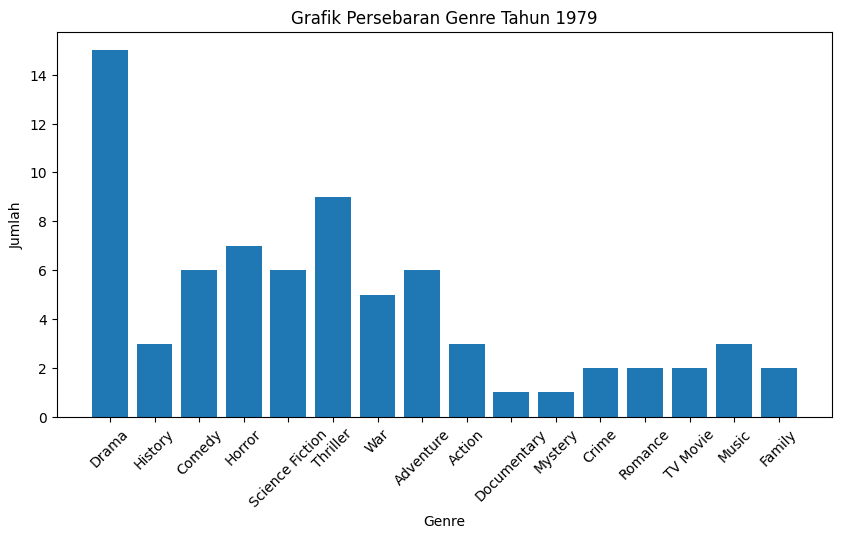

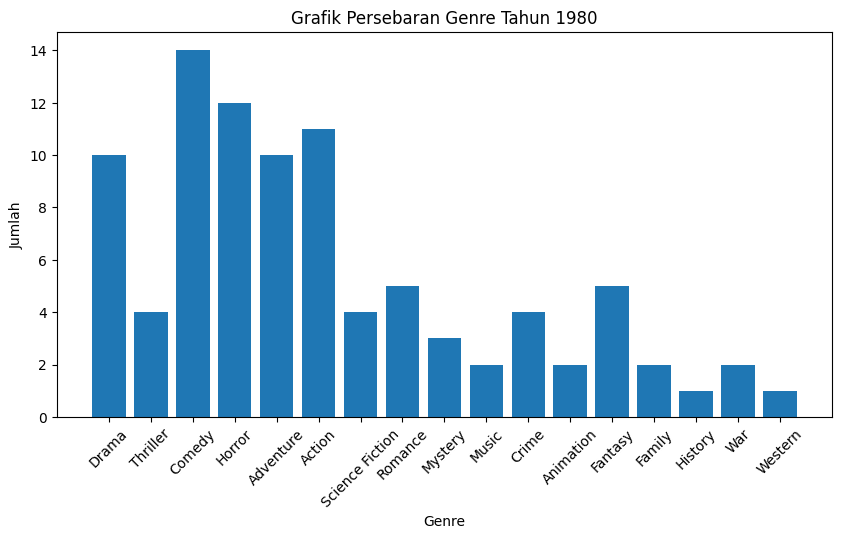

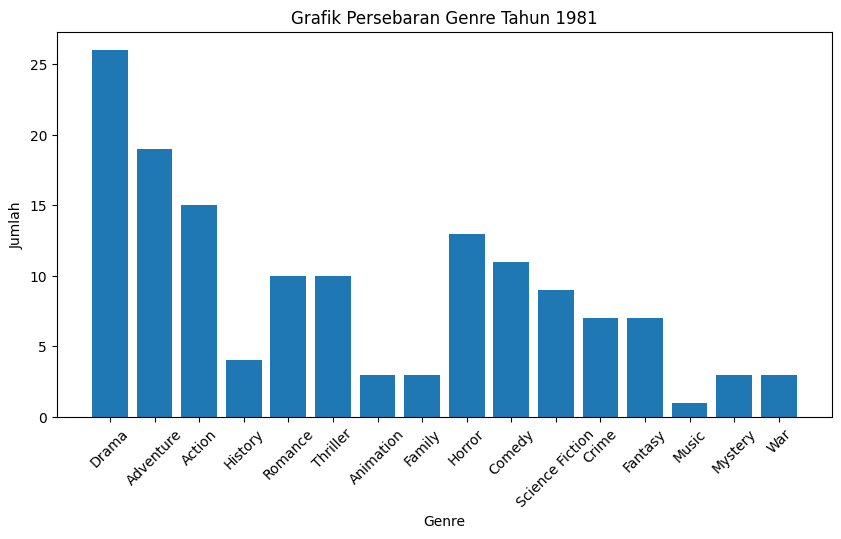

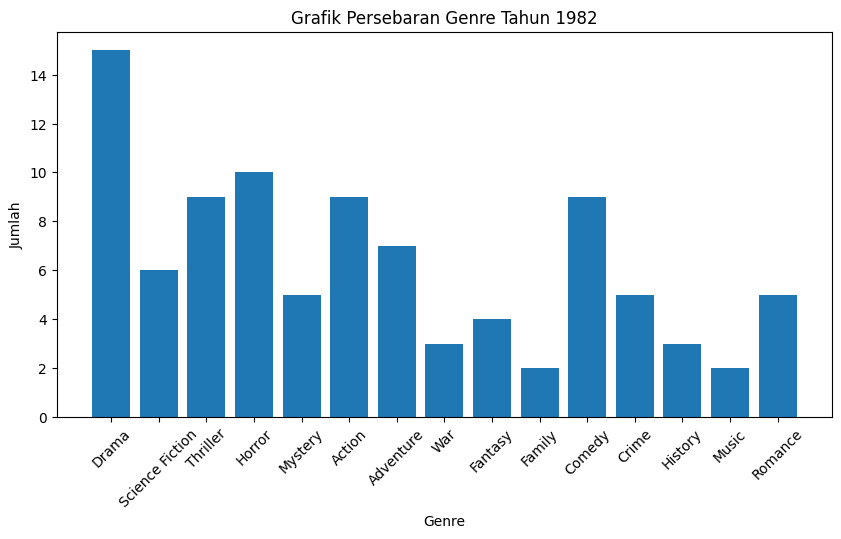

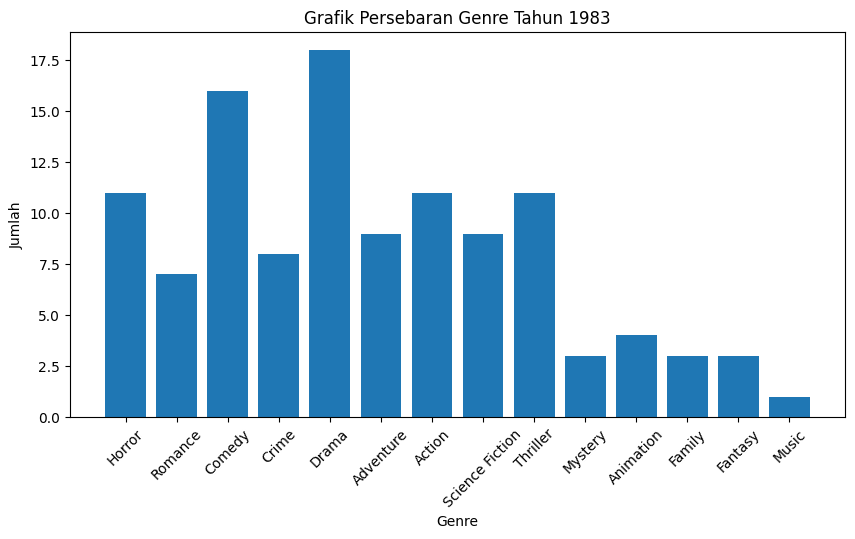

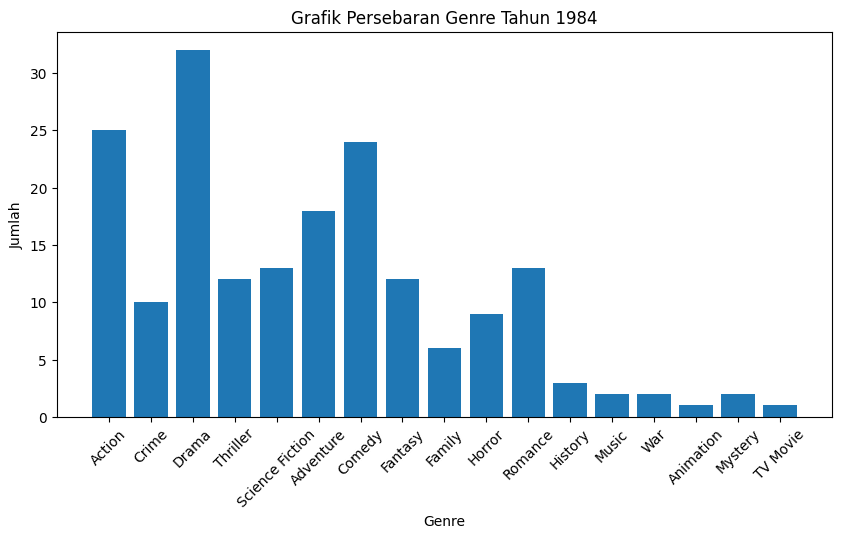

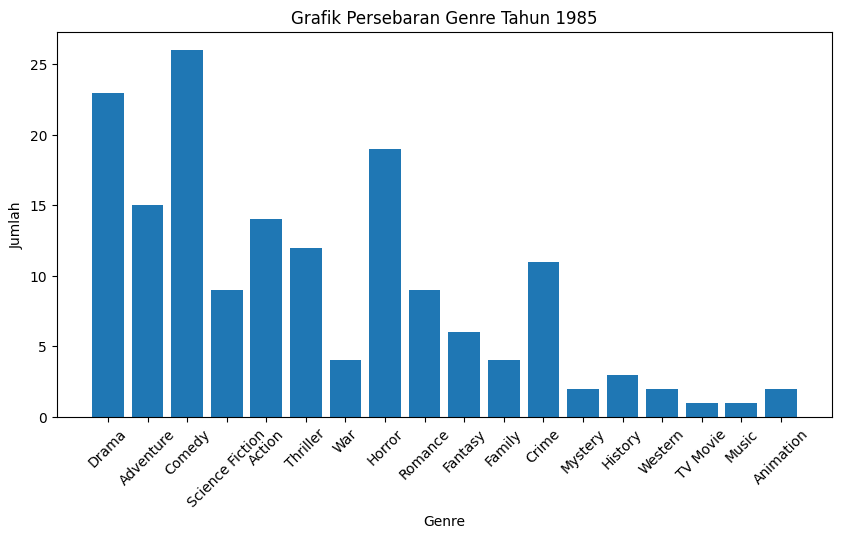

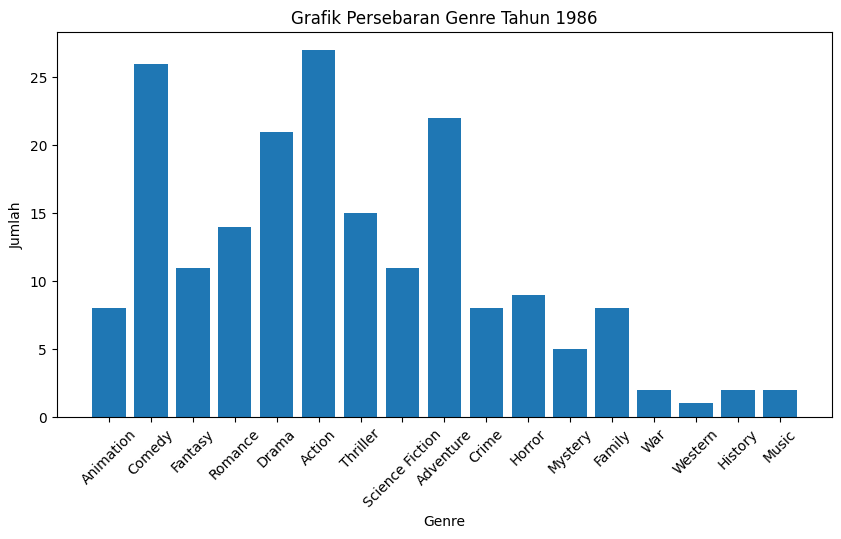

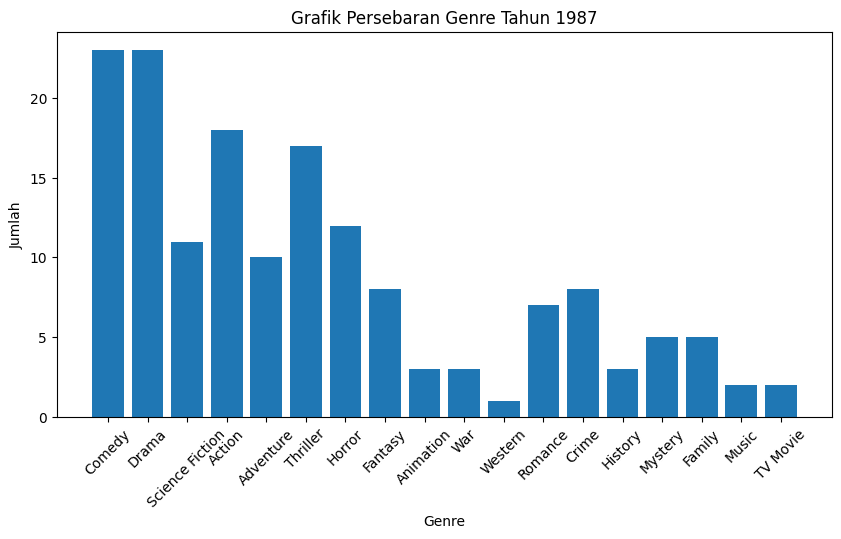

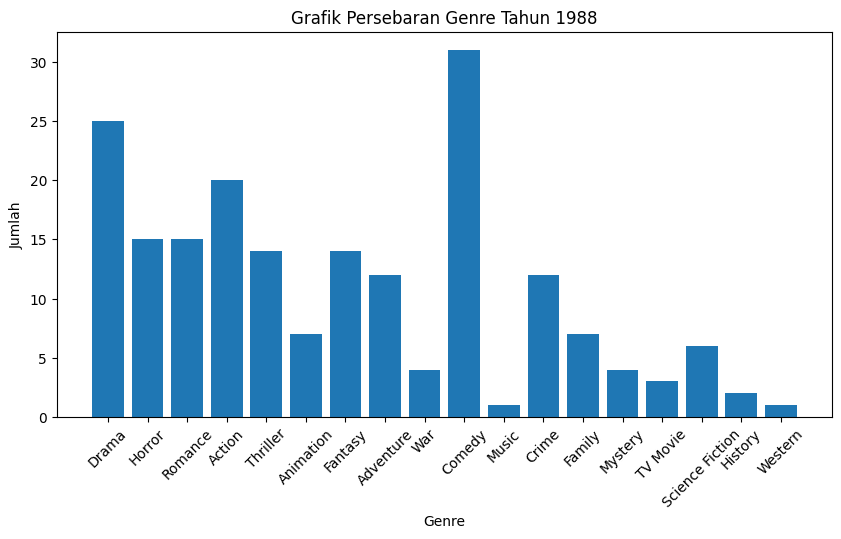

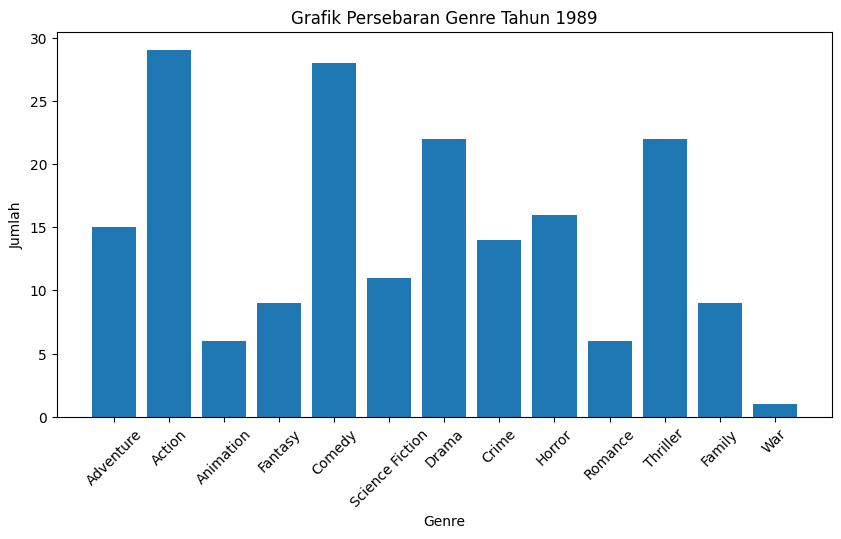

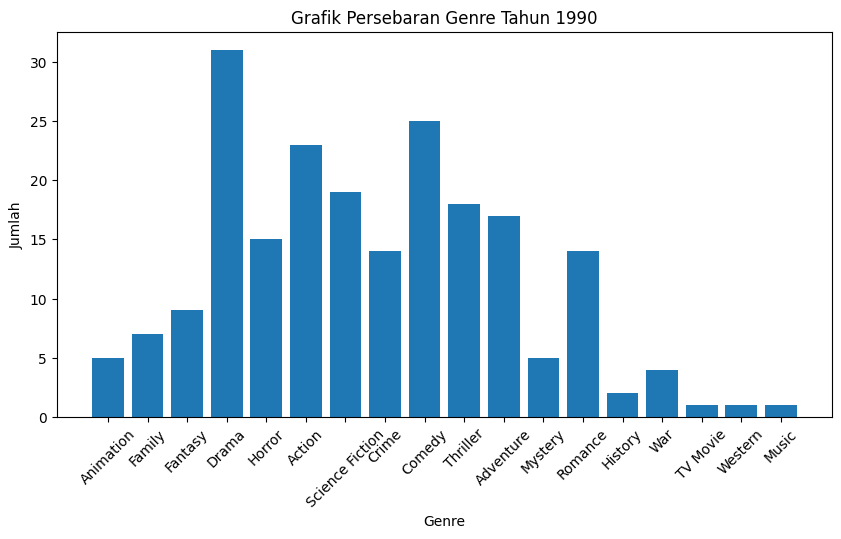

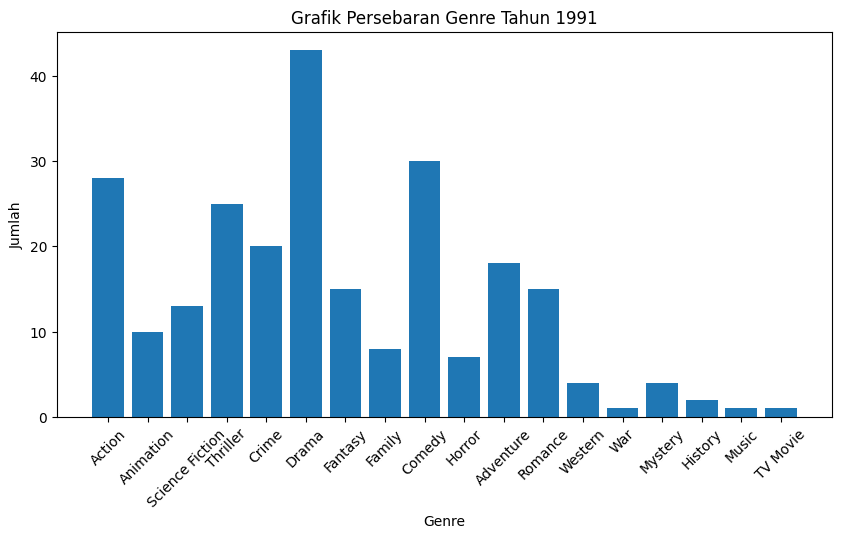

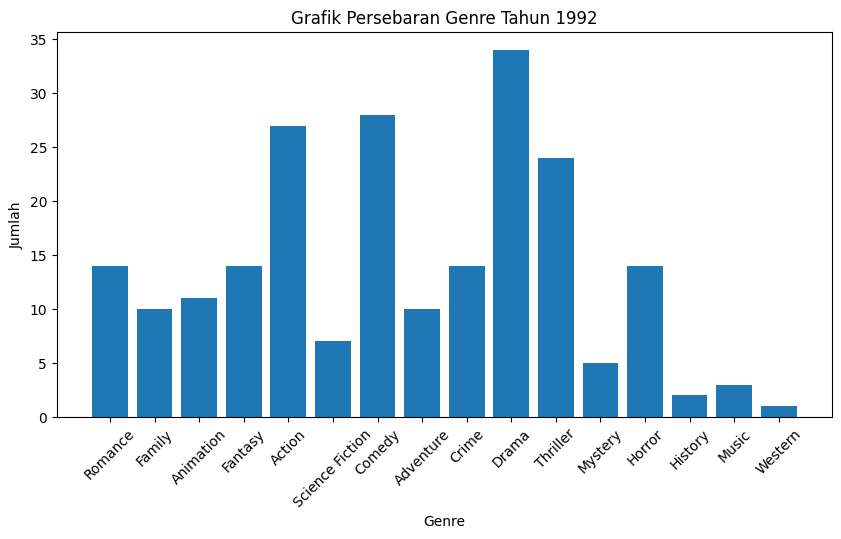

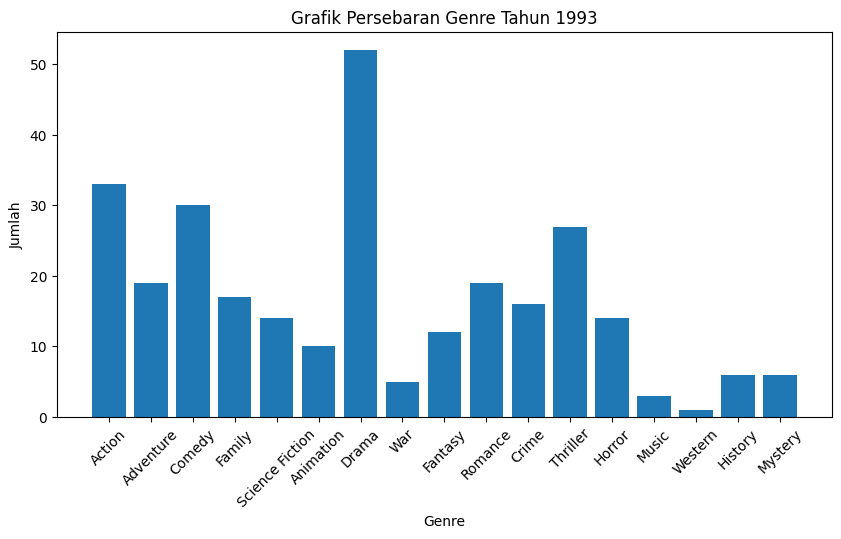

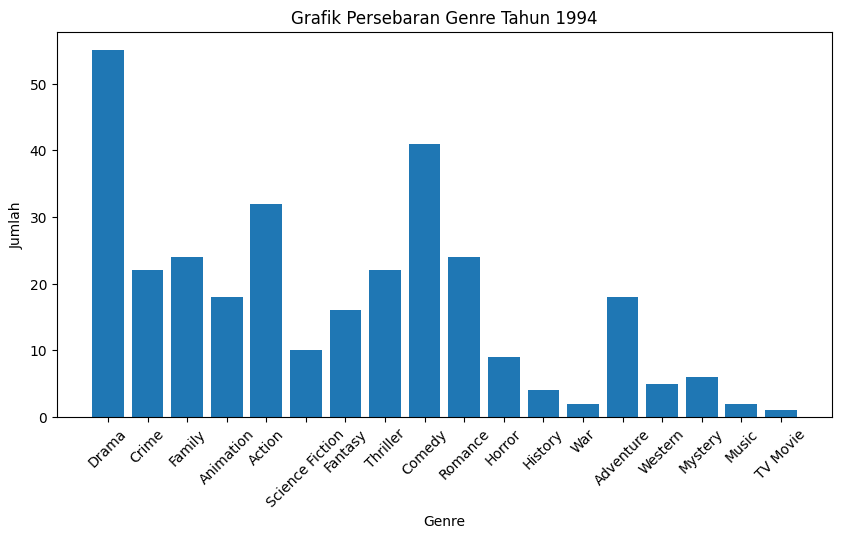

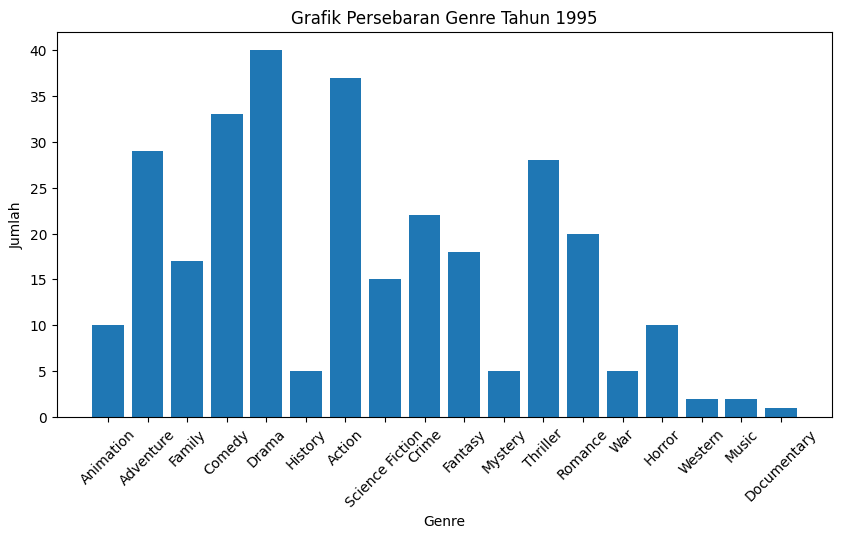

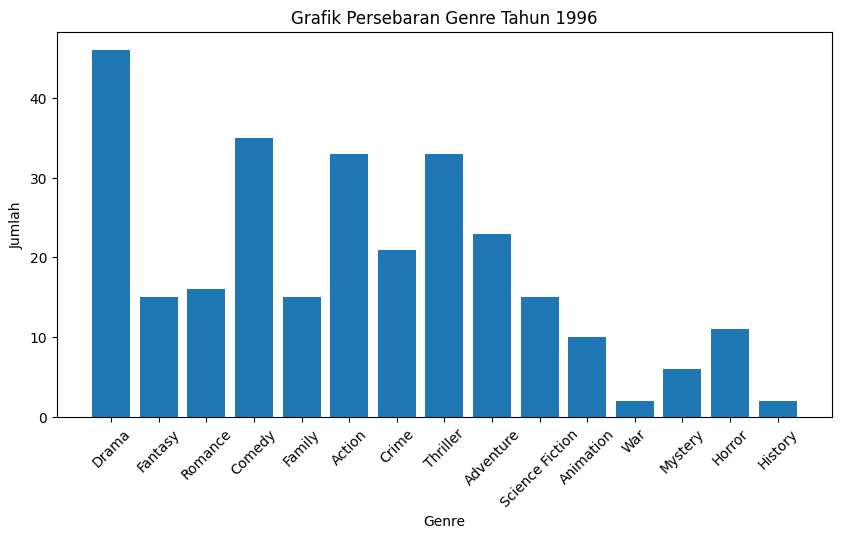

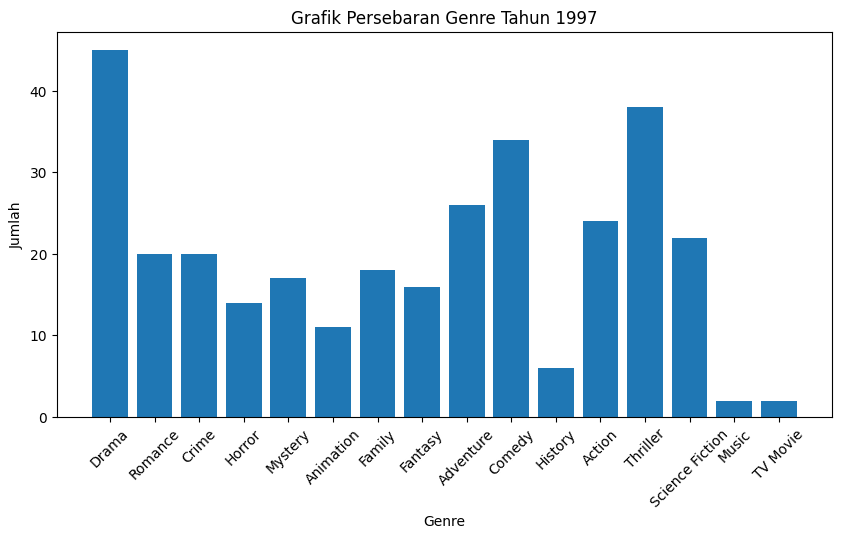

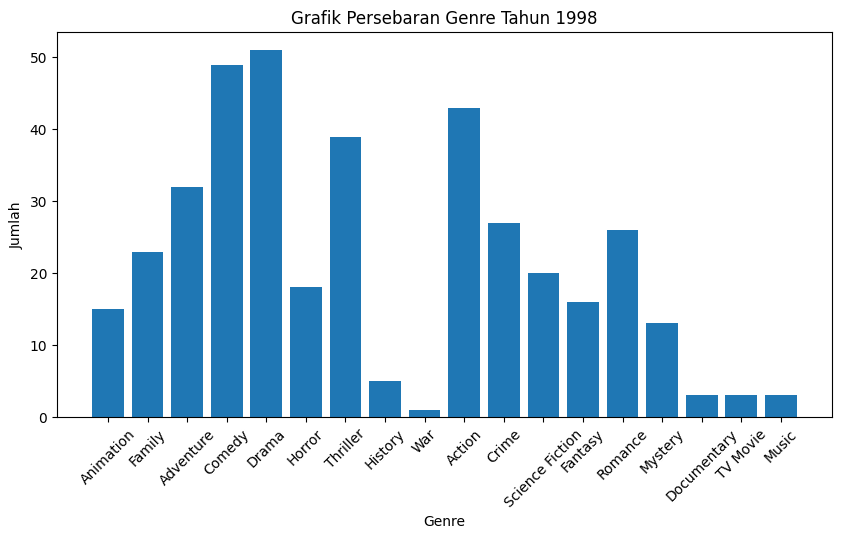

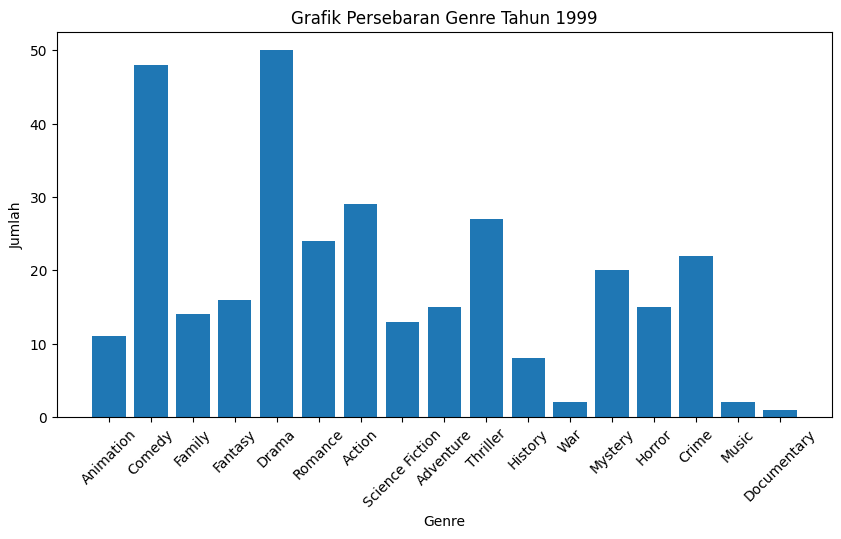

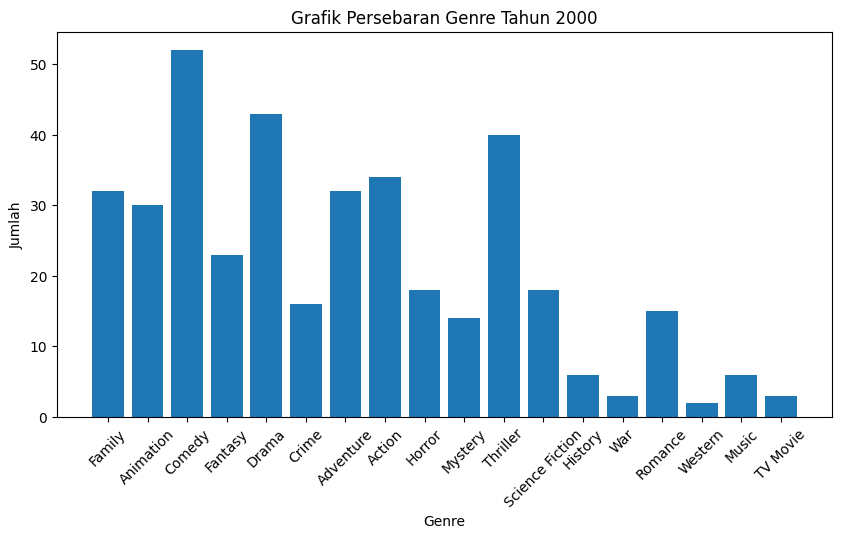

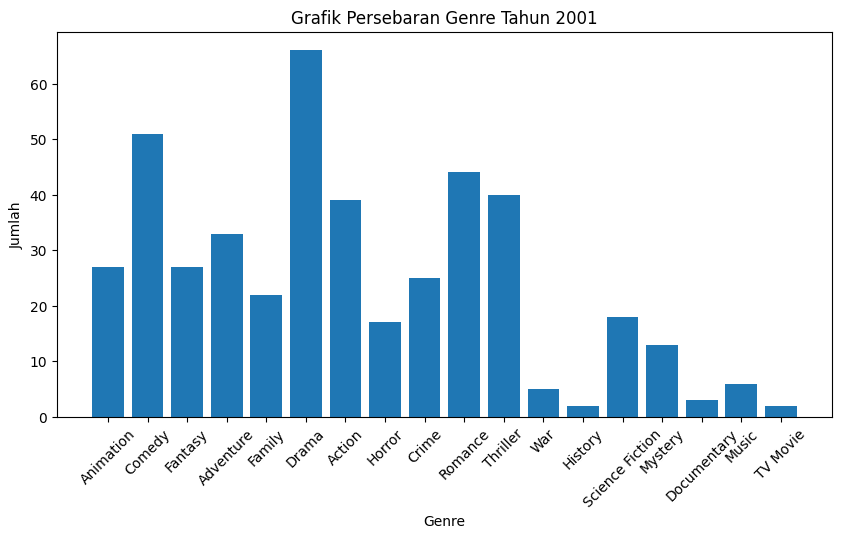

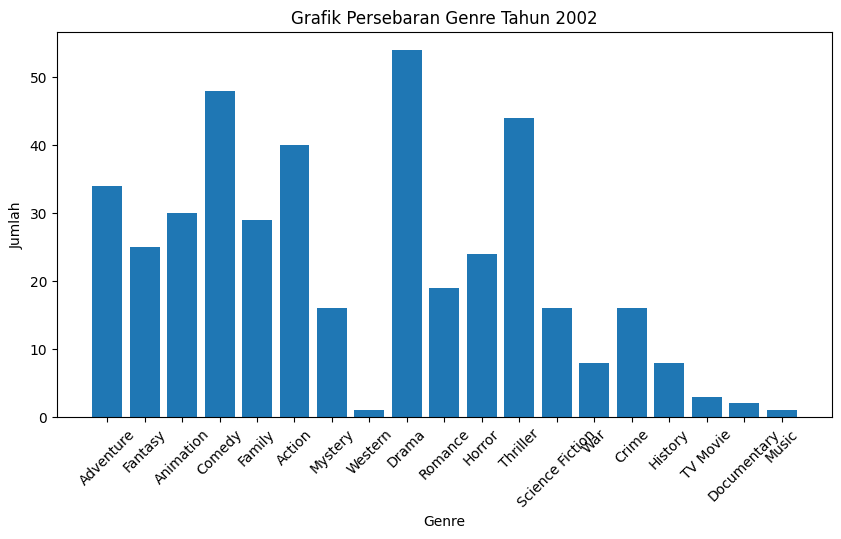

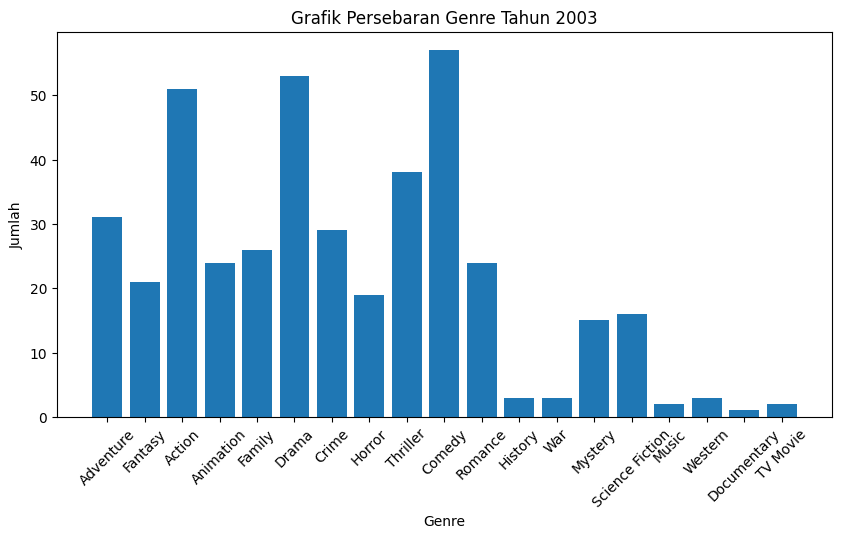

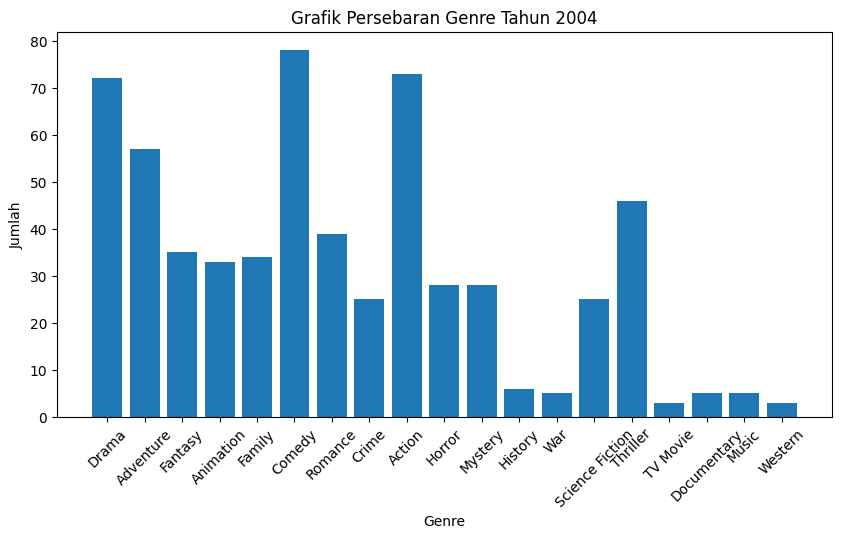

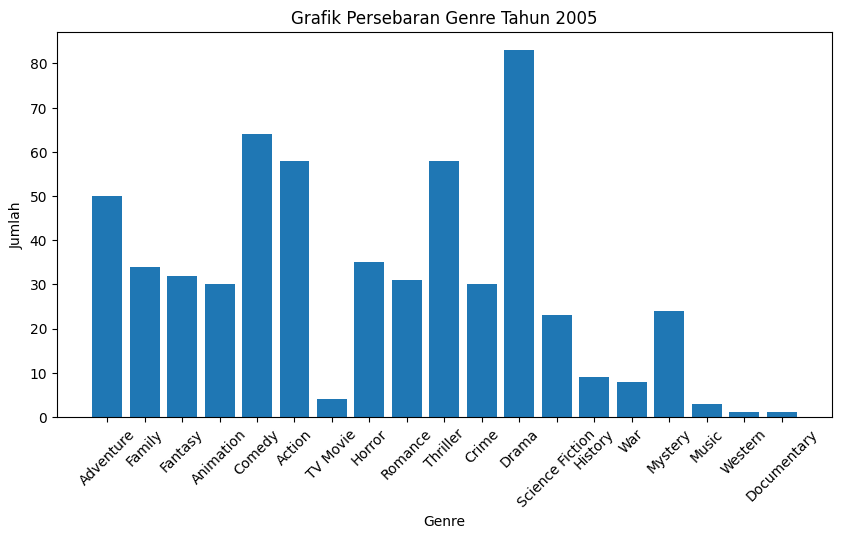

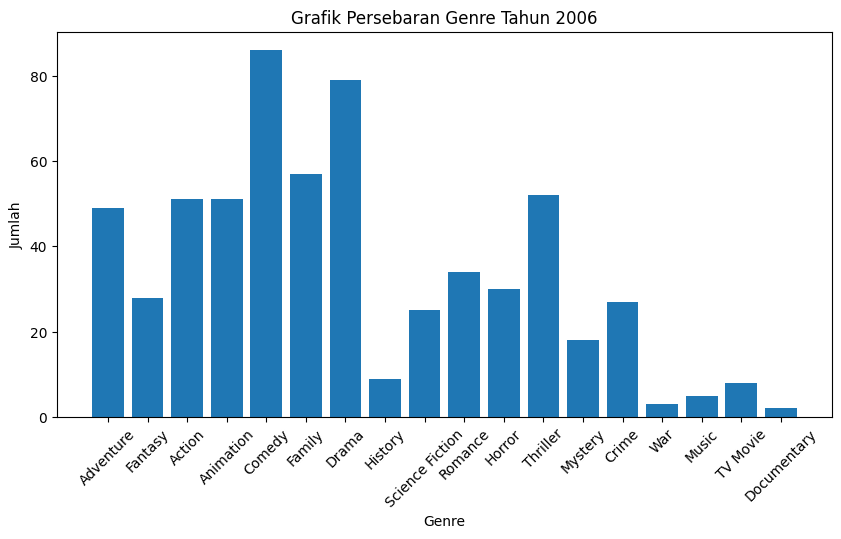

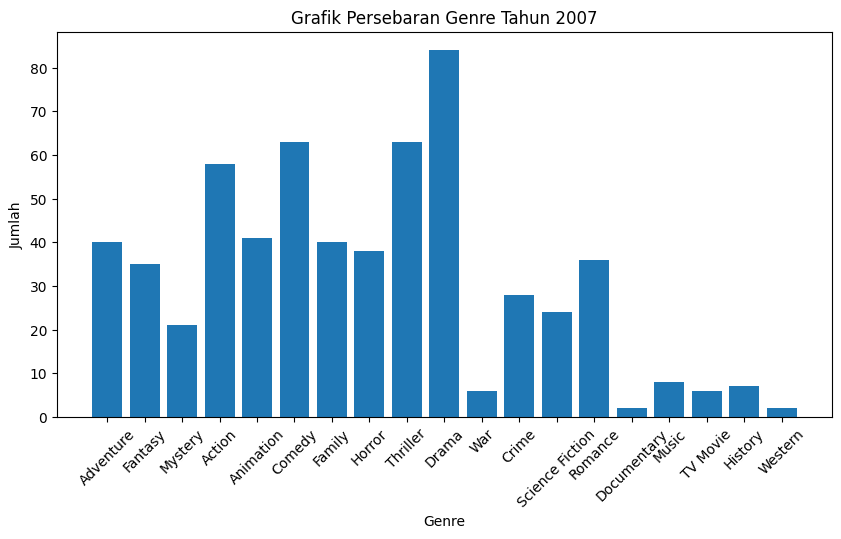

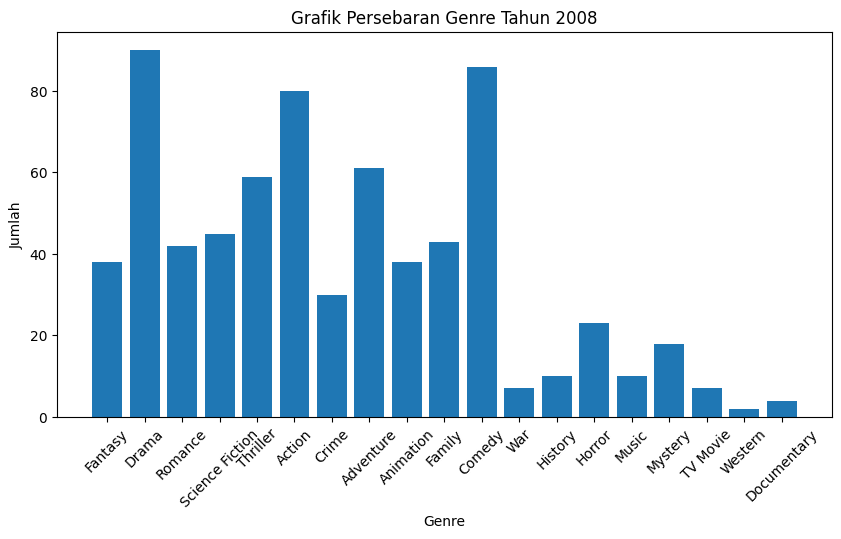

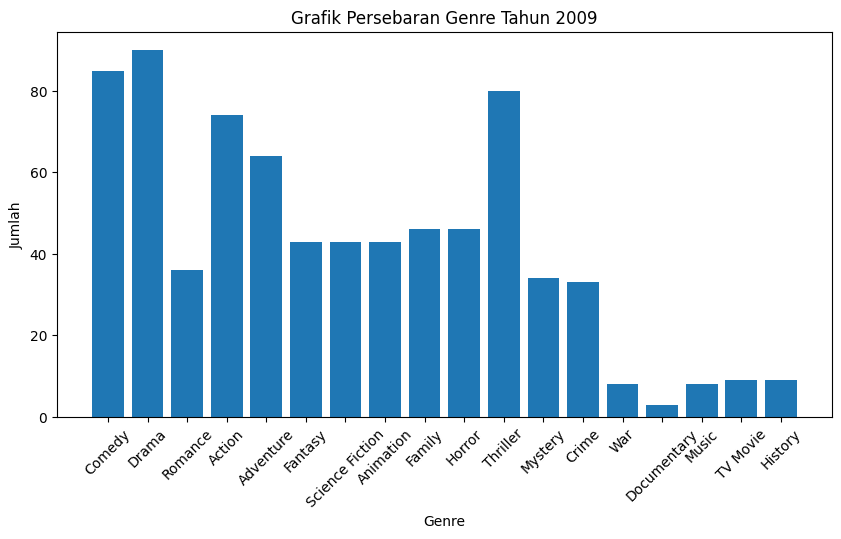

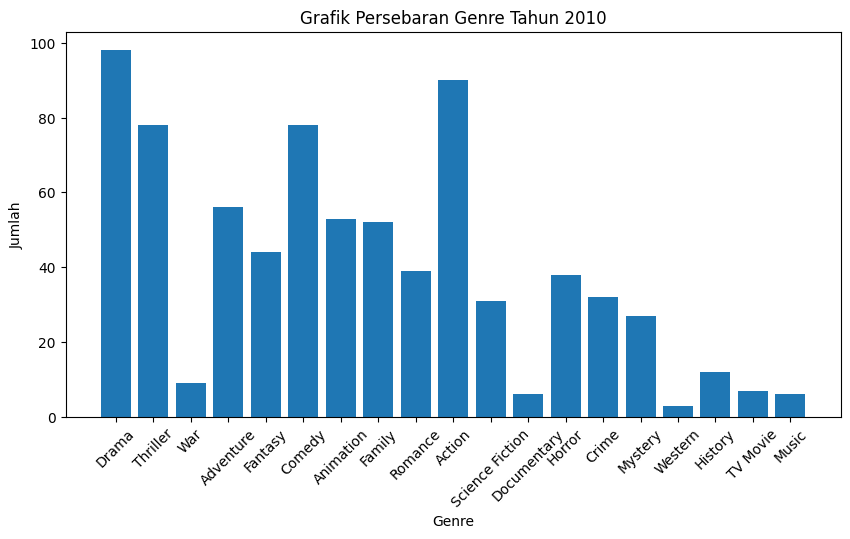

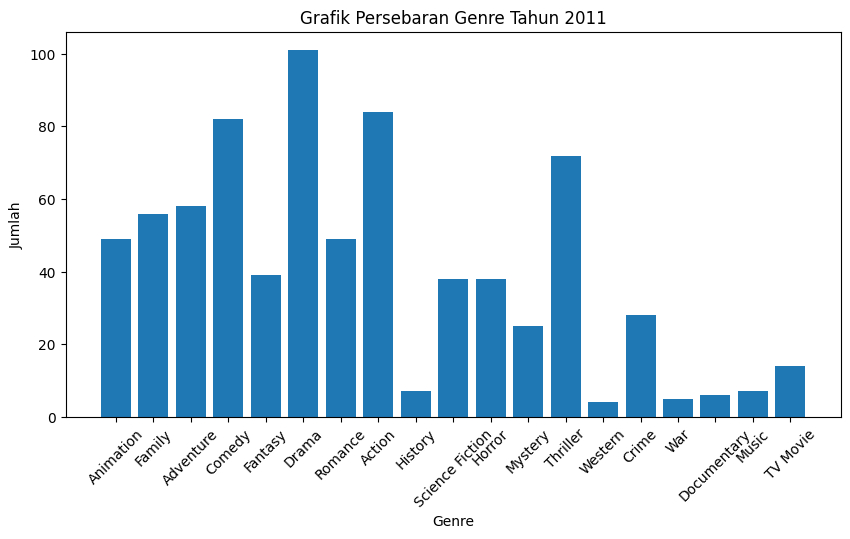

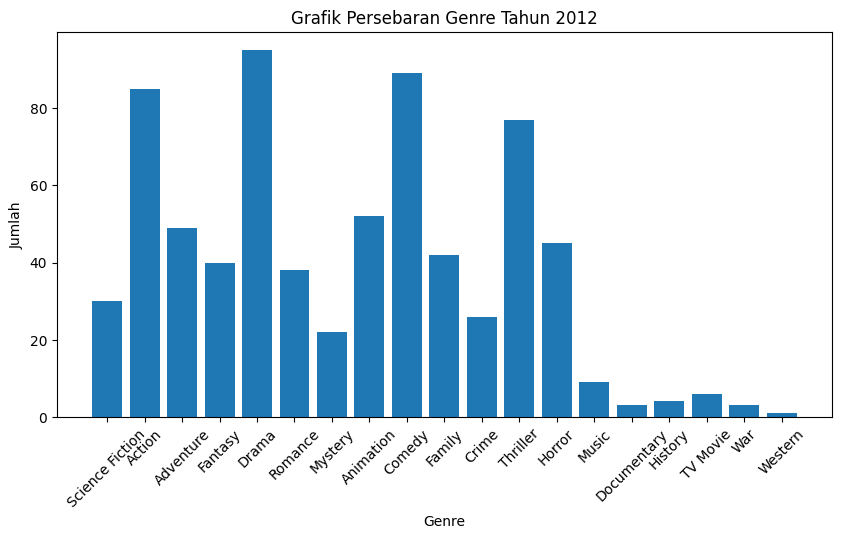

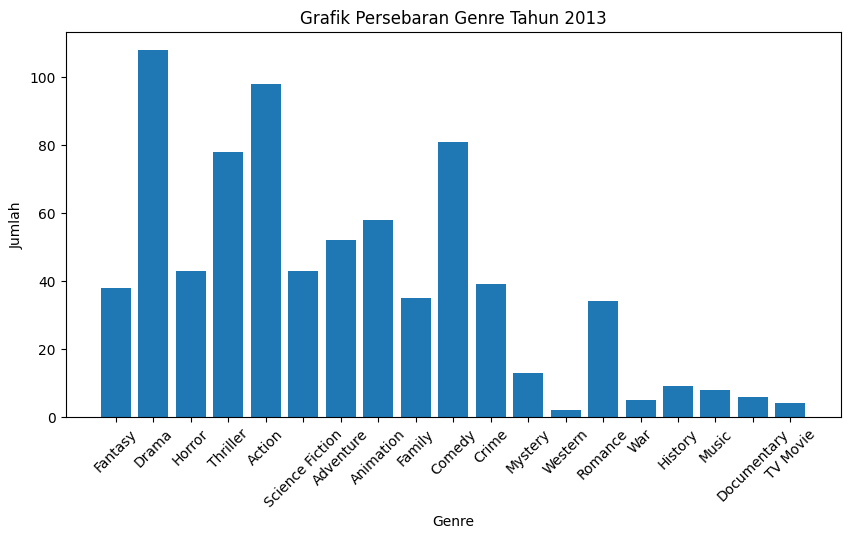

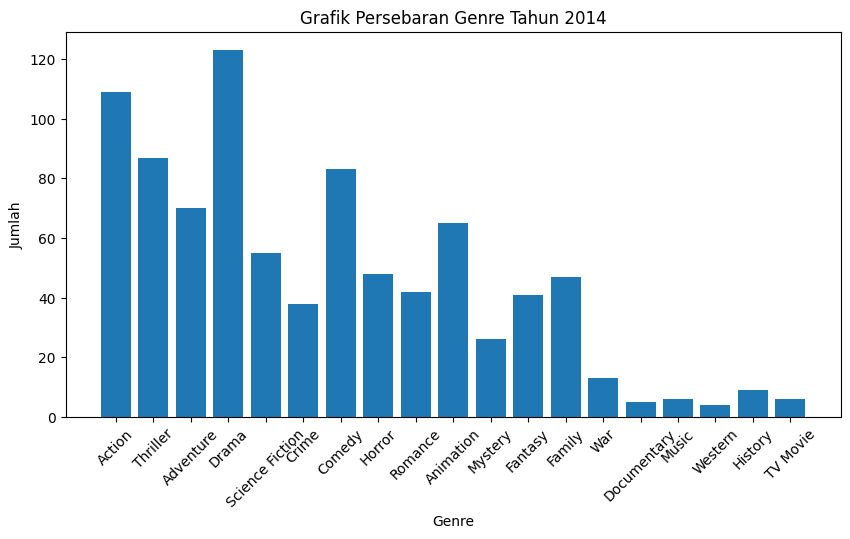

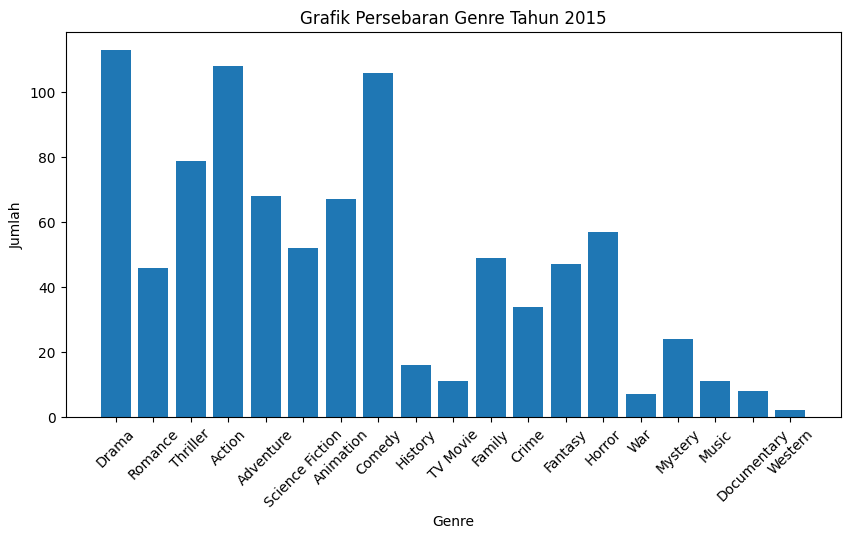

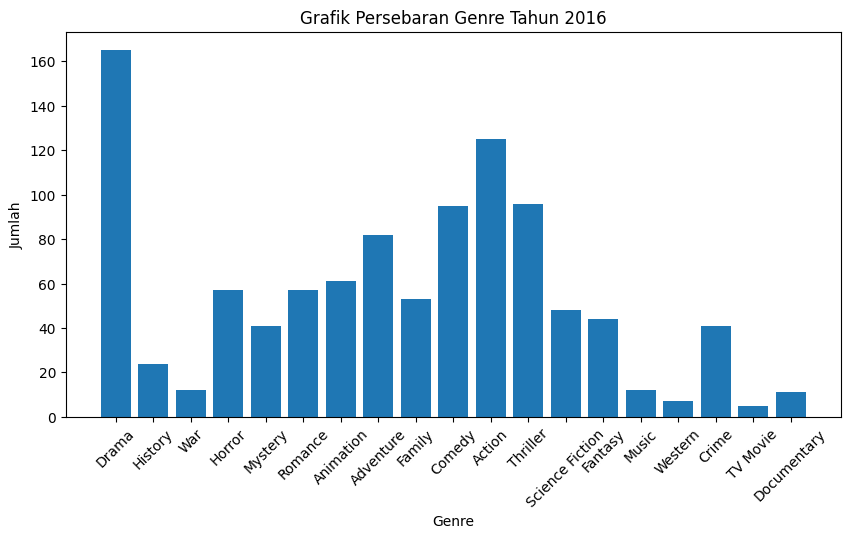

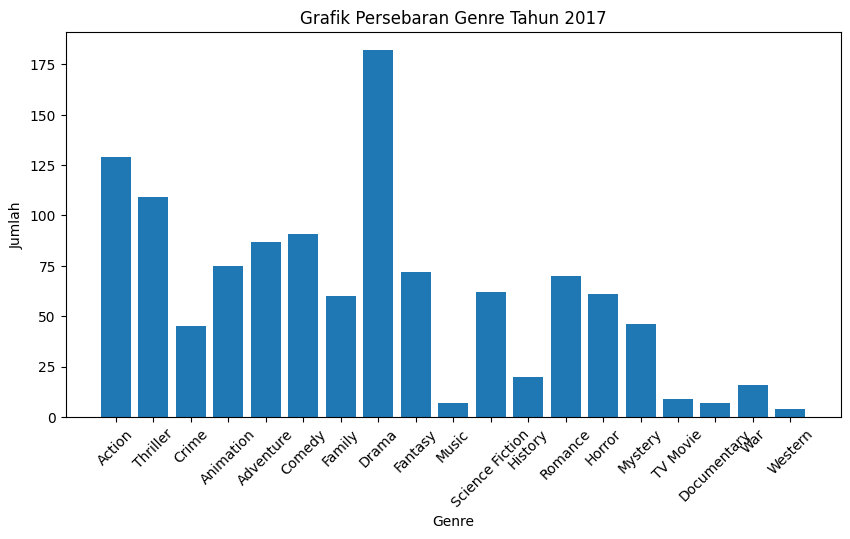

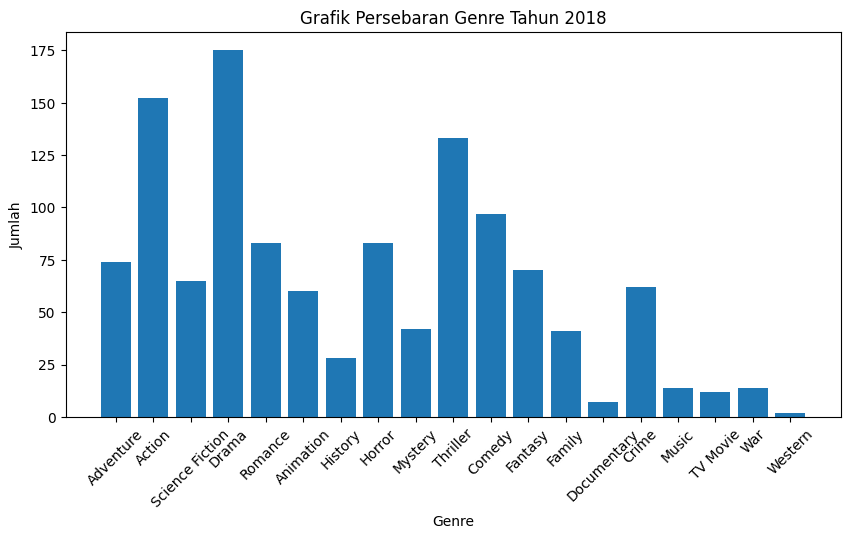

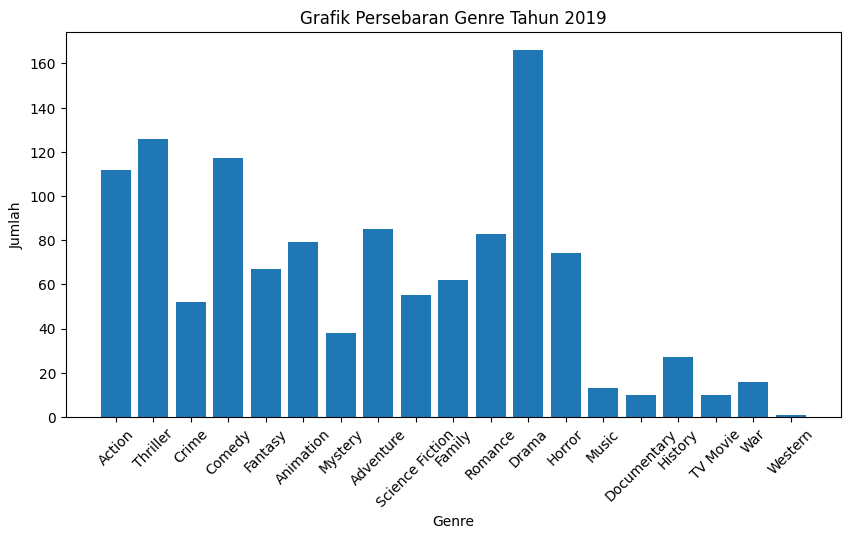

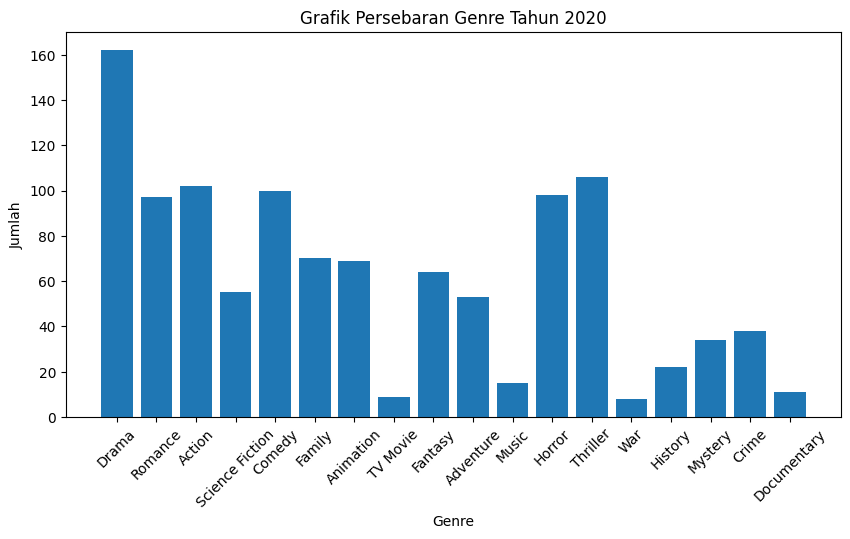

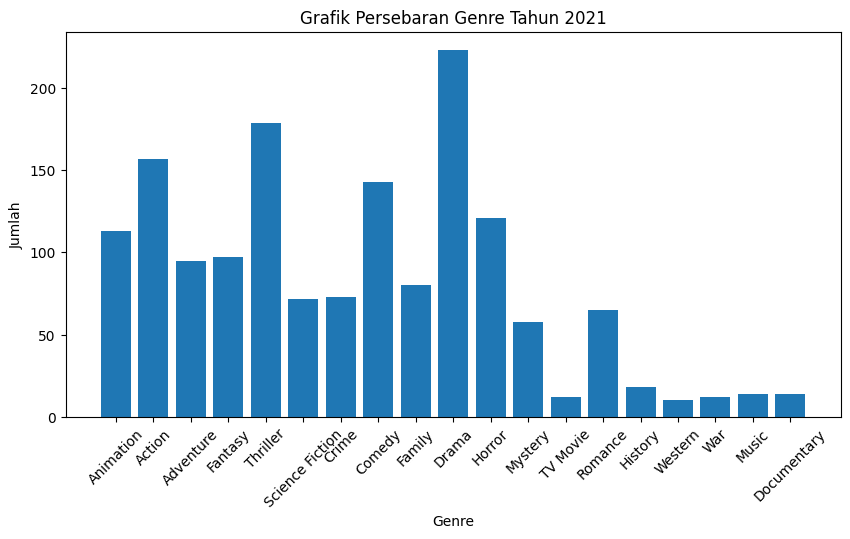

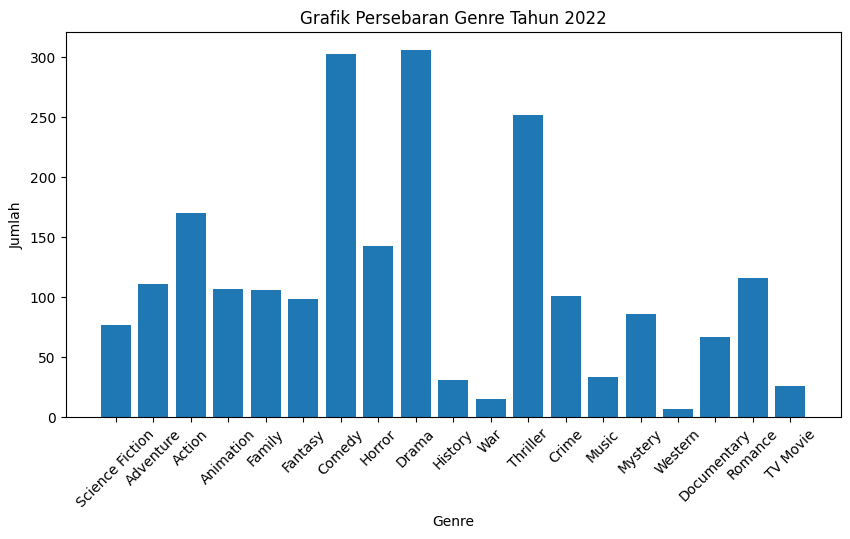

In [108]:
# Grafik persebaran genre dari tahun ke tahun
for year, genre_count in cleaned_genre_dict.items():
    genre = list(genre_count.keys())
    count = list(genre_count.values())

    plt.figure(figsize=(10, 5))
    plt.bar(genre, count)
    plt.title(f'Grafik Persebaran Genre Tahun {year}')
    plt.xlabel('Genre')
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.show()

In [9]:
#Menampung jumlah terbanyak pada setiap tahun
most_common_genre_by_year = {}

for year, genre_counts in cleaned_genre_dict.items():
    if genre_counts:  # Memeriksa apakah genre_counts tidak kosong
        max_count = max(genre_counts.values())  # Mencari jumlah maksimum dalam dictionary genre_counts
        most_common_genres = [genre for genre, count in genre_counts.items() if count == max_count]
        most_common_genre_by_year[year] = {'genre': most_common_genres, 'count': max_count}

# Print dictionary genre dengan jumlah terbanyak pada setiap tahun
for year, genre_info in most_common_genre_by_year.items():
    genres_str = ', '.join(genre_info['genre'])
    print(f"Tahun: {year}, Genre yang paling banyak: {genres_str}, Jumlah: {genre_info['count']}")

Tahun: 1970, Genre yang paling banyak: Western, Jumlah: 7
Tahun: 1971, Genre yang paling banyak: Drama, Jumlah: 9
Tahun: 1972, Genre yang paling banyak: Drama, Jumlah: 11
Tahun: 1973, Genre yang paling banyak: Drama, Jumlah: 11
Tahun: 1974, Genre yang paling banyak: Drama, Jumlah: 22
Tahun: 1975, Genre yang paling banyak: Drama, Jumlah: 12
Tahun: 1976, Genre yang paling banyak: Drama, Jumlah: 15
Tahun: 1977, Genre yang paling banyak: Drama, Jumlah: 14
Tahun: 1978, Genre yang paling banyak: Drama, Jumlah: 15
Tahun: 1979, Genre yang paling banyak: Drama, Jumlah: 15
Tahun: 1980, Genre yang paling banyak: Comedy, Jumlah: 14
Tahun: 1981, Genre yang paling banyak: Drama, Jumlah: 26
Tahun: 1982, Genre yang paling banyak: Drama, Jumlah: 15
Tahun: 1983, Genre yang paling banyak: Drama, Jumlah: 18
Tahun: 1984, Genre yang paling banyak: Drama, Jumlah: 32
Tahun: 1985, Genre yang paling banyak: Comedy, Jumlah: 26
Tahun: 1986, Genre yang paling banyak: Action, Jumlah: 27
Tahun: 1987, Genre yang pali

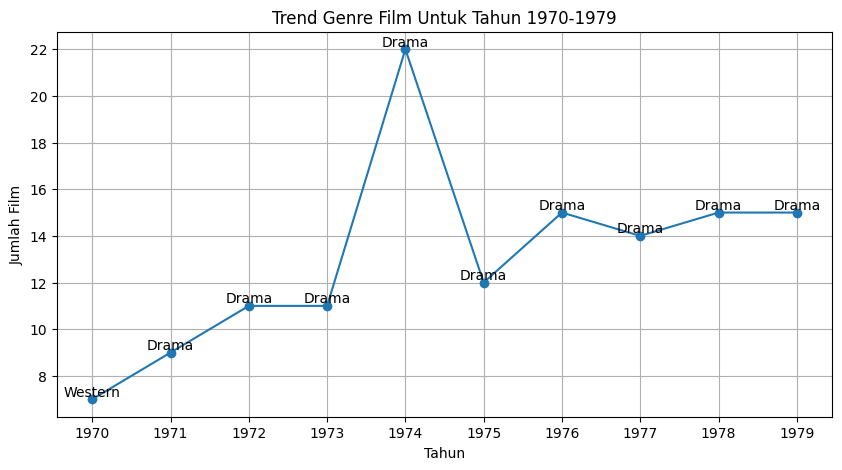

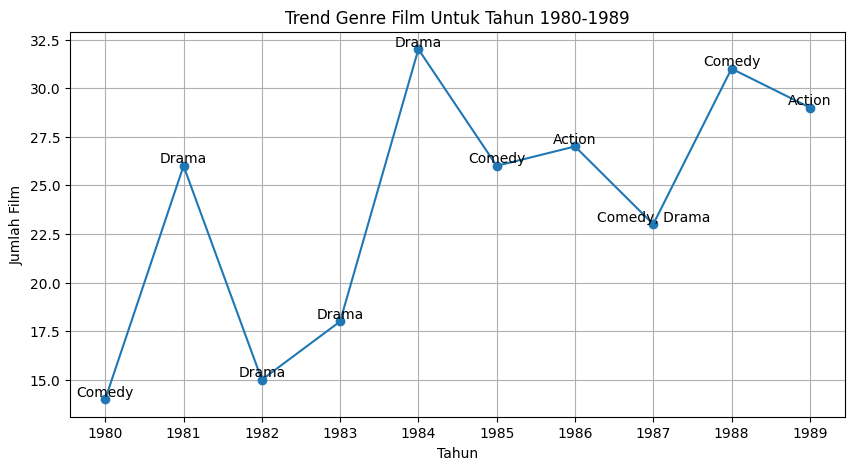

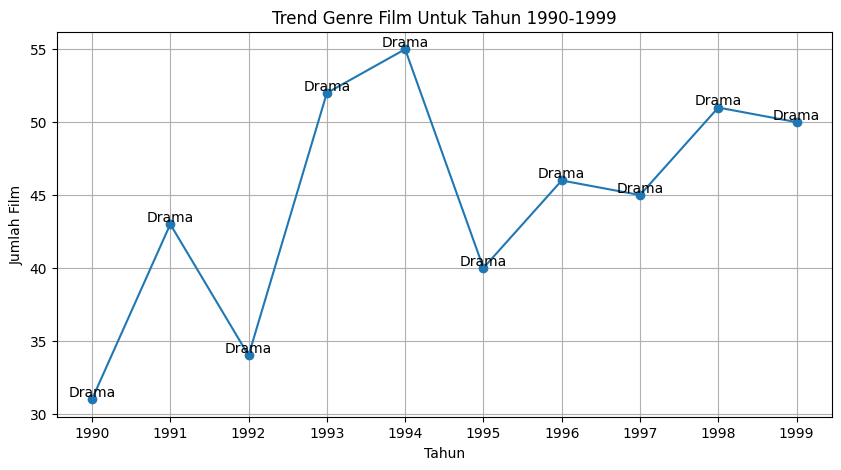

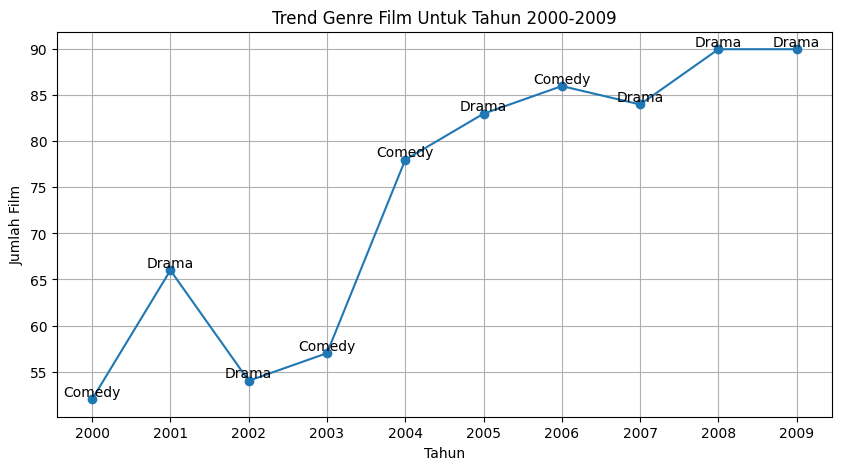

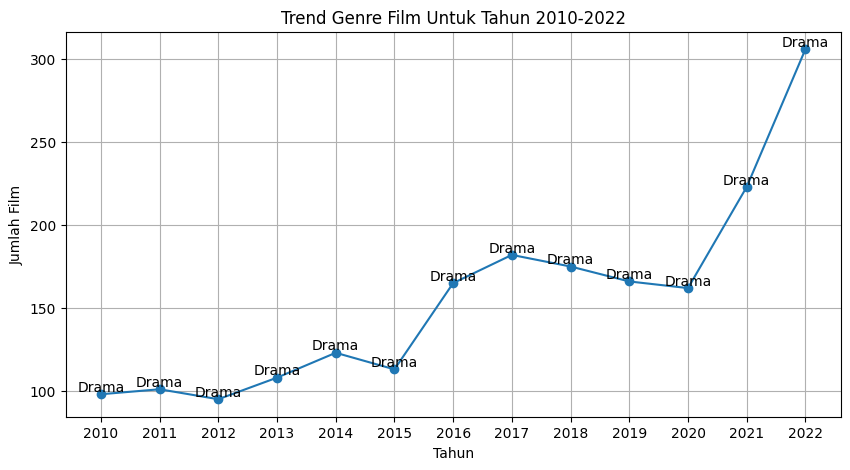

In [110]:
# grafik trend genre untuk setiap 10 tahun
start_year = 1970
end_year = start_year + 9

while end_year <= 2009:
    years = list(range(start_year, end_year + 1))
    genre_count = [most_common_genre_by_year.get(year, {'count': 0})['count'] for year in years]
    genre_label = [most_common_genre_by_year.get(year, {'genre': 'N/A'})['genre'] for year in years]

    plt.figure(figsize=(10, 5))
    plt.plot(years, genre_count, marker='o')
    for i, (year, count) in enumerate(zip(years, genre_count)):
        genres = genre_label[i]
        if genres != 'N/A':
            genres_str = ', '.join([genre.strip("[]'") for genre in genres]) #hapus tanda kurung siku dan petik
            plt.text(year, count, genres_str, ha='center', va='bottom')
    plt.title(f'Trend Genre Film Untuk Tahun {start_year}-{end_year}')
    plt.xlabel('Tahun')
    plt.ylabel('Jumlah Film')
    plt.xticks(years)
    plt.grid(True)
    plt.show()

    start_year += 10
    end_year += 10


start_year = 2010
end_year = start_year + 12  # Jeda tahun 12

while end_year <= 2022:
    years = list(range(start_year, end_year + 1))
    genre_count = [most_common_genre_by_year.get(year, {'count': 0})['count'] for year in years]
    genre_label = [most_common_genre_by_year.get(year, {'genre': 'N/A'})['genre'] for year in years]

    plt.figure(figsize=(10, 5))
    plt.plot(years, genre_count, marker='o')
    for i, (year, count) in enumerate(zip(years, genre_count)):
        genres = genre_label[i]
        if genres != 'N/A':
            genres_str = ', '.join([genre.strip("[]'") for genre in genres])  #hapus tanda kurung siku dan petik
            plt.text(year, count, genres_str, ha='center', va='bottom')
    plt.title(f'Trend Genre Film Untuk Tahun {start_year}-{end_year}')
    plt.xlabel('Tahun')
    plt.ylabel('Jumlah Film')
    plt.xticks(years)
    plt.grid(True)
    plt.show()

    start_year += 13
    end_year += 13

In [111]:
from collections import Counter

#mencari tahun dengan jumlah film terbanyak
most_common_year = max(film_count_per_year, key=film_count_per_year.get)
print(f"Tahun {most_common_year} memiliki jumlah film terbanyak dengan jumlah {film_count_per_year[most_common_year]} film")

#menghitung rata-rata perilisan film
average_release = data['names'].count() / (2022 - 1970 + 1)
print(f"Rata-rata perilisan film secara keseluruhan (1970 - 2022): {average_release:.0f} film per tahun")


#menghitung jumlah genre
genre_counter = Counter()

for year_info in most_common_genre_by_year.values():
    genres = year_info['genre']
    genre_counter.update(genres)

most_popular_genre = genre_counter.most_common(1)[0]
print(f"\nGenre yang paling populer sejak 1970 sampai 2022 adalah genre '{most_popular_genre[0]}', \ndimana menjadi genre yang paling banyak dirilis selama {most_popular_genre[1]} tahun")


Tahun 2022 memiliki jumlah film terbanyak dengan jumlah 954 film
Rata-rata perilisan film secara keseluruhan (1970 - 2022): 190 film per tahun

Genre yang paling populer sejak 1970 sampai 2022 adalah genre 'Drama', 
dimana menjadi genre yang paling banyak dirilis selama 43 tahun
